## Importing the Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  

#TensorFlow - Importing the Libraries
import tensorflow as tf
from tensorflow import keras

#PyTorch - Importing the Libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms

## Getting and Splitting the Dataset

In [2]:
#PyTorch - Getting and Splitting the Dataset
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset_pytorch = torchvision.datasets.FashionMNIST(root='./data/',
                                             train=True, 
                                             transform=transforms,
                                             download=True)
test_dataset_pytorch = torchvision.datasets.FashionMNIST(root='.data/',
                                             train=False, 
                                             transform=transforms,
                                             download=True)

In [3]:
#TensorFlow - Getting and Splitting the Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images_tf, train_labels_tf), (test_images_tf, test_labels_tf) = fashion_mnist.load_data()

## Loading the Data

tensor(9)


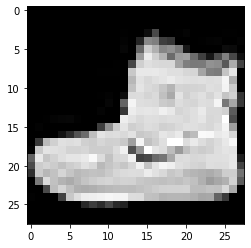

In [4]:
#PyTorch - Loading the Data
def imshowPytorch(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_pytorch,
                                           batch_size=32, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset_pytorch,
                                           batch_size=32, 
                                           shuffle=False)
                                           
data_iter = iter(train_loader)
images, label = data_iter.next()
imshowPytorch(torchvision.utils.make_grid(images[0]))
print(label[0])

9


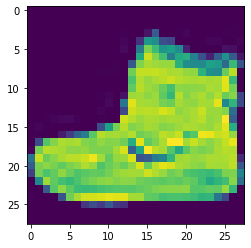

In [5]:
#TensorFlow - Loading the Data
def imshowTensorFlow(img):
  plt.imshow(img)
imshowTensorFlow(train_images_tf[0])

print(train_labels_tf[0])

## Building the Model

In [6]:
#PyTorch - Building the Model
class NeuralNet(nn.Module):
    def __init__(self, num_of_class):
        super(NeuralNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(84, 10)

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(-1, 16*5*5)
        x = self.fc_model(x)
        x = self.classifier(x)
        return x

In [7]:
#TensorFlow - Building the Model
modeltf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=6, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation=tf.nn.relu),
    keras.layers.Dense(84, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Visualizing the Model

In [8]:
#PyTorch - Visualizing the Model
modelpy = NeuralNet(10)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(modelpy.parameters())

modelpy

NeuralNet(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
  )
  (classifier): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
#TensorFlow - Visualizing the Model
modeltf.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
modeltf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Training the Model

In [10]:
#PyTorch - Training the Model
for e in range(30):
    # define the loss value after the epoch
    losss = 0.0
    number_of_sub_epoch = 0
    
    # loop for every training batch (one epoch)
    for images, labels in train_loader:
        #create the output from the network
        out = modelpy(images)
        # count the loss function
        loss = criterion(out, labels)
        # in pytorch you have assign the zero for gradien in any sub epoch
        optim.zero_grad()
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        # add new value to the main loss
        losss += loss.item()
        number_of_sub_epoch += 1
    print("Epoch {}: Loss: {}".format(e, losss / number_of_sub_epoch))

Epoch 0: Loss: 0.6227099574804306
Epoch 1: Loss: 0.4179951703429222
Epoch 2: Loss: 0.35394162097771964
Epoch 3: Loss: 0.31588206316630046
Epoch 4: Loss: 0.2895640591740608
Epoch 5: Loss: 0.2687729511876901
Epoch 6: Loss: 0.251606637219588
Epoch 7: Loss: 0.23748337679803372
Epoch 8: Loss: 0.22412400639454524
Epoch 9: Loss: 0.21168595918913682
Epoch 10: Loss: 0.20105701752901078
Epoch 11: Loss: 0.19044897941052913
Epoch 12: Loss: 0.18115745490640403
Epoch 13: Loss: 0.17252162928283216
Epoch 14: Loss: 0.16545736669301986
Epoch 15: Loss: 0.15640809882879259
Epoch 16: Loss: 0.1498145791510741
Epoch 17: Loss: 0.14355199264089266
Epoch 18: Loss: 0.1380430019915104
Epoch 19: Loss: 0.13102651527822018
Epoch 20: Loss: 0.12447771841287612
Epoch 21: Loss: 0.12084027421437205
Epoch 22: Loss: 0.11766422504087289
Epoch 23: Loss: 0.10957689811562499
Epoch 24: Loss: 0.10643648336914678
Epoch 25: Loss: 0.10487306278670827
Epoch 26: Loss: 0.09565478510657946
Epoch 27: Loss: 0.09731809958498926
Epoch 28: 

In [11]:
#TensorFlow - Training the Model
train_images_tensorflow = (train_images_tf / 255.0).reshape(train_images_tf.shape[0], 28, 28, 1)
test_images_tensorflow = (test_images_tf / 255.0).reshape(test_images_tf.shape[0], 28, 28 ,1)
train_labels_tensorflow=keras.utils.to_categorical(train_labels_tf)
test_labels_tensorflow=keras.utils.to_categorical(test_labels_tf)
modeltf.fit(train_images_tensorflow, train_labels_tensorflow, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5243 - accuracy: 0.8064
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3532 - accuracy: 0.8710
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8893
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2692 - accuracy: 0.8992
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - accuracy: 0.9071
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9147
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2139 - accuracy: 0.9194
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2004 - accuracy: 0.9255
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1875 - accuracy: 0.9295
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.174

## Comparing the Results

In [12]:
#PyTorch - Comparing the Results
correct = 0
total = 0
modelpy.eval()
for images, labels in test_loader:
    outputs = modelpy(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}% with PyTorch'.format(total, 100 * correct // total))


Test Accuracy of the model on the 10000 test images: 89% with PyTorch


In [13]:
#TensorFlow - Comparing the Results
predictions = modeltf.predict(test_images_tensorflow)
correct = 0
for i, pred in enumerate(predictions):
  if np.argmax(pred) == test_labels_tf[i]:
    correct += 1
print('Test Accuracy of the model on the {} test images: {}% with TensorFlow'.format(test_images_tf.shape[0],
                                                                     100 * correct/test_images_tf.shape[0]))

Test Accuracy of the model on the 10000 test images: 91.34% with TensorFlow
